In [1]:
#%reset
import random as rd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import random as rd
from datetime import datetime
from keras import *
from keras.metrics import *
from keras.callbacks import *
from keras.utils import to_categorical
from keras.optimizers import Adam
import sys  
sys.path.insert(0, '/home/familia/Documentos/DeepLeanringPytonChollet/')
import util
import modelos
import pydot
from keras.utils.vis_utils import plot_model

In [2]:
#0 is normal
#1 is not normal
Normal=0
ventana=40000
begin=4000
fin=begin+ventana
paso=ventana
epocas=75

In [3]:
a,b,c,d=util.extraer_datos_IACOB(0,begin,fin);

IMPORTANT The spectrum is NOT corrected from barycentric velocity                [astropy.io.fits.card]
IMPORTANT Use the keyword I_VBAR below to correct from barycentric velocity      [astropy.io.fits.card]
IMPORTANT This fits file includes a normalized and the orig. merged spect.       [astropy.io.fits.card]
VERY IMPORTANT ** The I_SPC keyword below is only orientative, no definitive. ** [astropy.io.fits.card]
VERY IMPORTANT ** Please, use it carefully, not as a reference !!!            ** [astropy.io.fits.card]
IMPORTANT Use the keyword I_VBAR to correct from barycentric velocity            [astropy.io.fits.card]


In [4]:
len(c)

49

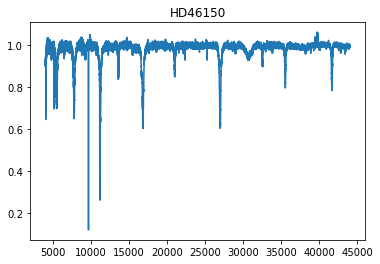

In [5]:
x=[i for i in range(begin,fin)]
plt.plot(x,c[5])
plt.title(d[5])
plt.show()

In [6]:
esnan=np.isnan(a)
for i in range(len(esnan)):
    erro=np.argwhere(np.isnan(a[i]))
    if len(erro)>1:
        print(i,len(erro))

In [7]:
a=util.Normalizar_Datos(a)
c=util.Normalizar_Datos(c)

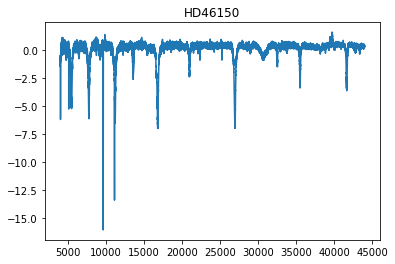

In [8]:
x=[i for i in range(begin,fin)]
plt.plot(x,c[5])
plt.title(d[5])
plt.show()

In [9]:
train,label=util.revolver(a[:49],c)
xtrain,ytrain,xval,yval,xtest,ytest=util.conjuntos(train,label)

(58, 40000) (21, 40000) (19, 40000)


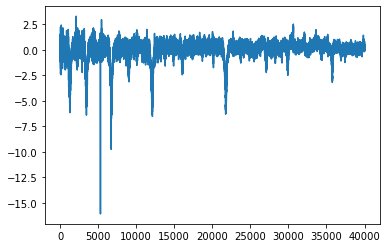

In [10]:
print(xtrain.shape,xval.shape,xtest.shape)
plt.plot(xtrain[50])

In [11]:
xtrain1=xtrain.reshape((xtrain.shape[0],xtrain.shape[1],1))
xval1=xval.reshape((xval.shape[0],xval.shape[1],1))
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [12]:
modelo=modelos.Convolucional(4,4,ventana,4)
modelo.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy'])

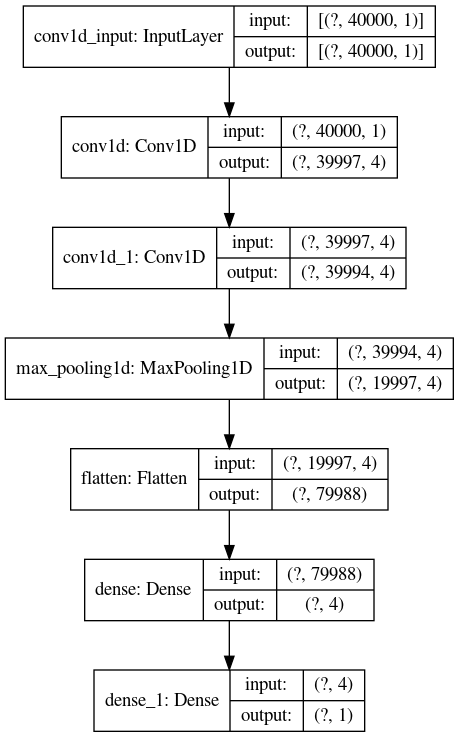

In [13]:
plot_model(modelo, to_file='model_Convolutional_plot.png', show_shapes=True, show_layer_names=True)

In [14]:
historia=modelo.fit(xtrain1,ytrain,epochs=epocas,validation_data=(xval1,yval))

Epoch 1/75
2/2 [==============================] - 1s 575ms/step - loss: 1.6712 - accuracy: 0.5690 - val_loss: 1.2359 - val_accuracy: 0.6190
Epoch 2/75
2/2 [==============================] - 0s 24ms/step - loss: 1.5855 - accuracy: 0.5172 - val_loss: 0.6662 - val_accuracy: 0.4762
Epoch 3/75
2/2 [==============================] - 0s 22ms/step - loss: 0.4013 - accuracy: 0.7759 - val_loss: 0.4604 - val_accuracy: 0.5714
Epoch 4/75
2/2 [==============================] - 0s 22ms/step - loss: 0.2662 - accuracy: 0.8448 - val_loss: 0.2800 - val_accuracy: 1.0000
Epoch 5/75
2/2 [==============================] - 0s 22ms/step - loss: 0.2174 - accuracy: 0.9828 - val_loss: 0.2650 - val_accuracy: 1.0000
Epoch 6/75
2/2 [==============================] - 0s 22ms/step - loss: 0.1883 - accuracy: 1.0000 - val_loss: 0.2182 - val_accuracy: 1.0000
Epoch 7/75
2/2 [==============================] - 0s 23ms/step - loss: 0.1683 - accuracy: 1.0000 - val_loss: 0.2281 - val_accuracy: 1.0000
Epoch 8/75
2/2 [==========

2/2 [==============================] - 0s 20ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 60/75
2/2 [==============================] - 0s 20ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 61/75
2/2 [==============================] - 0s 19ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 62/75
2/2 [==============================] - 0s 21ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 63/75
2/2 [==============================] - 0s 21ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 64/75
2/2 [==============================] - 0s 19ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 65/75
2/2 [==============================] - 0s 20ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 66/75
2/2 [===============

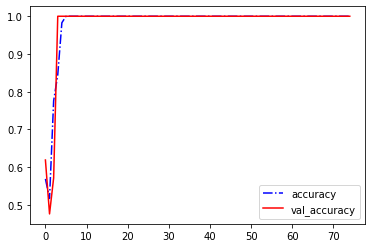

In [17]:
mae=historia.history['accuracy']
loss=historia.history['val_accuracy']
sigue=range(75)
plt.plot(sigue,mae,'b-.',label='accuracy')
plt.plot(sigue,loss,'r-',label='val_accuracy')
plt.legend()

In [15]:
modelo.evaluate(xtest,ytest)

1/1 [==============================] - 0s 1ms/step - loss: 0.0299 - accuracy: 1.0000


[0.02989054098725319, 1.0]

In [16]:
aver=modelo.predict(xtest)
for i in range(len(aver)):
    print(aver[i],ytest[i])

[0.9498425] 1.0
[0.00593002] 0.0
[0.00222267] 0.0
[0.9525761] 1.0
[0.97061676] 1.0
[0.00962165] 0.0
[0.9728564] 1.0
[0.9436209] 1.0
[0.95817065] 1.0
[0.01592473] 0.0
[0.9442936] 1.0
[0.01335769] 0.0
[0.00252106] 0.0
[0.94829166] 1.0
[0.9178805] 1.0
[0.99660045] 1.0
[0.95291305] 1.0
[0.00251249] 0.0
[0.00960882] 0.0


In [35]:
#model_json = modelo3.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#modelo3.save_weights("model.h5")
#print("Saved model to disk")

In [18]:
prueba2=a[50:120]
prueba2=prueba2.reshape(prueba2.shape[0],prueba2.shape[1],1)

In [19]:
modelo.predict(prueba2)

array([[0.9892818 ],
       [0.9976787 ],
       [0.99739754],
       [0.9947413 ],
       [0.9975873 ],
       [0.9956495 ],
       [0.9962369 ],
       [0.9972229 ],
       [0.9952048 ],
       [0.9903593 ],
       [0.9974825 ],
       [0.9976387 ],
       [0.9974037 ],
       [0.9978503 ],
       [0.9935666 ],
       [0.9973979 ],
       [0.9947548 ],
       [0.9938691 ],
       [0.99686325],
       [0.9961713 ],
       [0.9955129 ],
       [0.99481636],
       [0.9980854 ],
       [0.9974903 ],
       [0.9947621 ],
       [0.9979419 ],
       [0.99348843],
       [0.996307  ],
       [0.9986312 ],
       [0.99710923],
       [0.9974402 ],
       [0.999148  ],
       [0.9936148 ],
       [0.99578214],
       [0.9978375 ],
       [0.99699306],
       [0.9970427 ],
       [0.9977387 ],
       [0.9972698 ],
       [0.9973104 ],
       [0.9983277 ],
       [0.9256222 ],
       [0.99708456],
       [0.99761   ],
       [0.998175  ],
       [0.99810225],
       [0.99779236],
       [0.992

In [38]:
#with open('model.json') as json_file:
#    json_config = json_file.read()
#new_model = models.model_from_json(json_config)
#new_model.load_weights('model.h5')
